# ***Regresión***

In [ ]:
# Librerías

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from google.colab import drive
drive.mount('/content/gdrive')

# Definimos la ruta del archivo
path = r'/content/gdrive/MyDrive/Colab Notebooks/Maquina y big data/Laboratorio 4/PDP_ICE_limpio.csv'
df_autos = pd.read_csv(path)

#En este paso, visualizamos para ver los datos con los que vamos a trabajar

df_autos

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,edad_vendedor,edad_auto,km_recorridos,reparaciones,tipo,precio
0,23,2.17,25142.768002,24,0,4077
1,26,18.92,120164.547502,17,0,2804
2,35,24.90,90244.499657,13,0,4432
3,34,1.93,15384.326615,18,0,5340
4,67,6.88,32319.146178,19,0,4053
...,...,...,...,...,...,...
995,50,20.87,79052.936636,0,1,4394
996,32,4.29,33727.348590,15,0,5408
997,62,12.43,30398.468612,9,0,6426
998,65,28.53,174801.168085,19,0,747


In [ ]:
# Exploración inicial del dataset
df_autos.describe()

,edad_vendedor,edad_auto,km_recorridos,reparaciones,tipo,precio
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,46.152000,20.59965,82377.836218,12.807000,0.187000,4354.076000
std,16.866576,11.28514,49873.724305,7.395569,0.390107,1960.881333
min,18.000000,1.00000,14738.735614,0.000000,0.000000,-1543.000000
25%,32.000000,10.72750,42881.726662,6.000000,0.000000,3048.000000
50%,46.000000,20.87500,70263.224727,13.000000,0.000000,4310.500000
75%,61.000000,30.29000,111688.819188,19.000000,0.000000,5758.250000
max,75.000000,39.99000,239619.058017,25.000000,1.000000,10523.000000


In [ ]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edad_vendedor  1000 non-null   int64  
 1   edad_auto      1000 non-null   float64
 2   km_recorridos  1000 non-null   float64
 3   reparaciones   1000 non-null   int64  
 4   tipo           1000 non-null   int64  
 5   precio         1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


Notamos la ausencia de valores nulos, por lo tanto no hay que limpiar ninguna columna pero si hay que normalizar, además de que el valor de precios en min está negativo, lo cual es un dato sucio o erroneo y hay que corregirlo.


In [ ]:
# Creamos un nuevo Dataset donde solamente queden los precios arriba de 0
df_autos_limpio = df_autos[df_autos['precio'] > 0].copy()

# Imprimimos el viejo dataset y el nuevo para comparar que cantidad de datos se limpiaron
print(f"Datos originales: {len(df_autos)}")
print(f"Datos limpios: {len(df_autos_limpio)}")

Datos originales: 1000
Datos limpios: 987


In [ ]:
df_autos_limpio.describe()

#Como podemos ver ya no posee valores negativos

,edad_vendedor,edad_auto,km_recorridos,reparaciones,tipo,precio
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,46.089159,20.382087,80981.053367,12.691996,0.189463,4417.696049
std,16.874917,11.194254,48602.527436,7.341452,0.392075,1892.655000
min,18.000000,1.000000,14738.735614,0.000000,0.000000,92.000000
25%,32.000000,10.590000,42820.287432,6.000000,0.000000,3090.500000
50%,46.000000,20.680000,68562.849380,13.000000,0.000000,4338.000000
75%,61.000000,30.075000,109340.528599,19.000000,0.000000,5767.500000
max,75.000000,39.990000,239619.058017,25.000000,1.000000,10523.000000


In [ ]:
X = df_autos_limpio.drop('precio', axis=1)
y = df_autos_limpio['precio']

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizamos

# Las columnas a escalar (sacamos 'tipo' porque ya es 0 y 1)
columnas_a_escalar = ['edad_vendedor', 'edad_auto', 'km_recorridos', 'reparaciones']

scaler = StandardScaler()

X_train[columnas_a_escalar] = scaler.fit_transform(X_train[columnas_a_escalar])
X_test[columnas_a_escalar] = scaler.transform(X_test[columnas_a_escalar])

# Imprimimos los resultados

print(X_train.head())

     edad_vendedor  edad_auto  km_recorridos  reparaciones  tipo
768      -0.733917  -0.615900      -0.809220     -0.106738     0
728       1.642446  -1.003978      -0.357253      1.528523     0
49        1.523628   0.372013       1.084774     -1.605726     0
730      -1.030962  -0.326171      -0.544232      0.847164     0
376      -0.912144  -1.541793      -1.265100     -0.379281     0


#Visualizar correlaciones (heatmap y regplot)

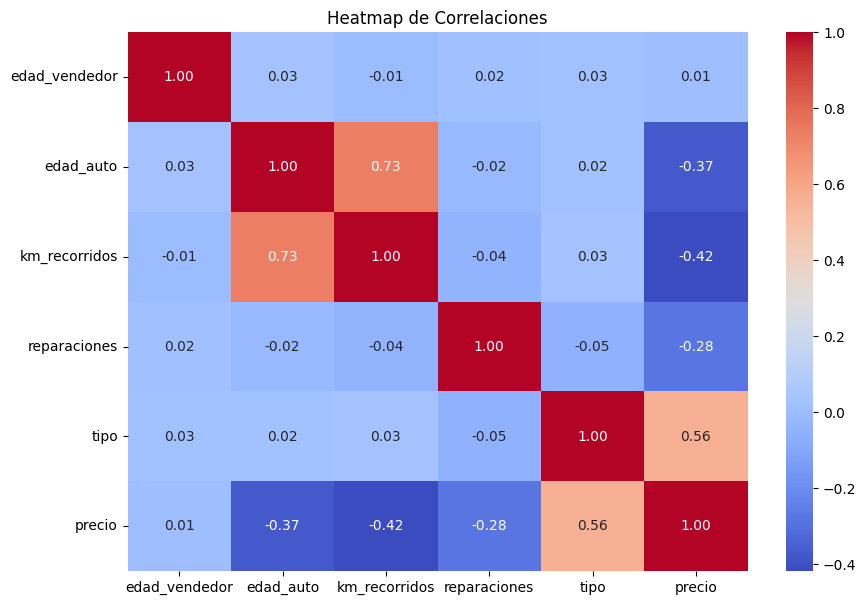

In [ ]:
correlaciones = df_autos_limpio.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlaciones')
plt.show()

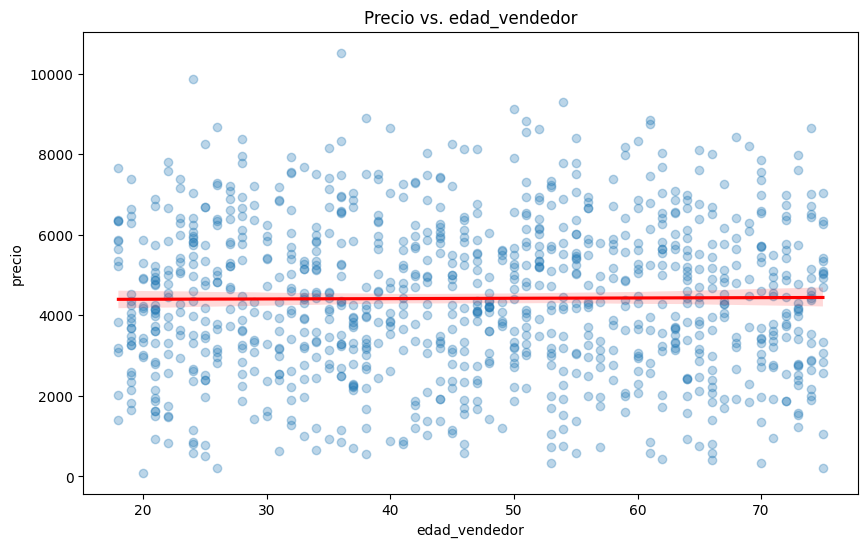

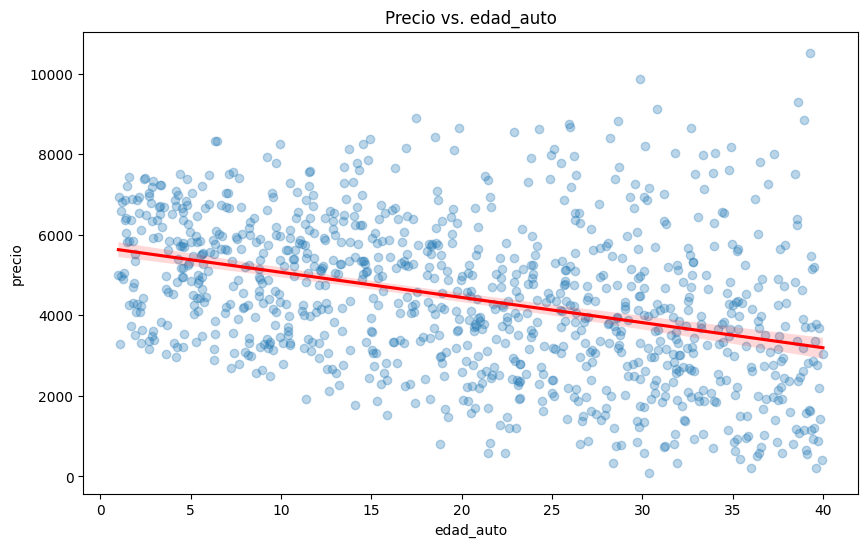

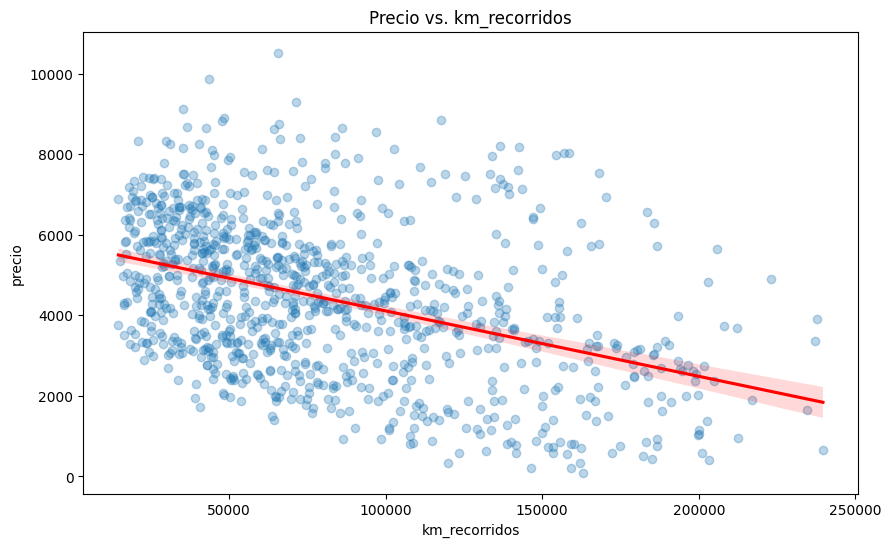

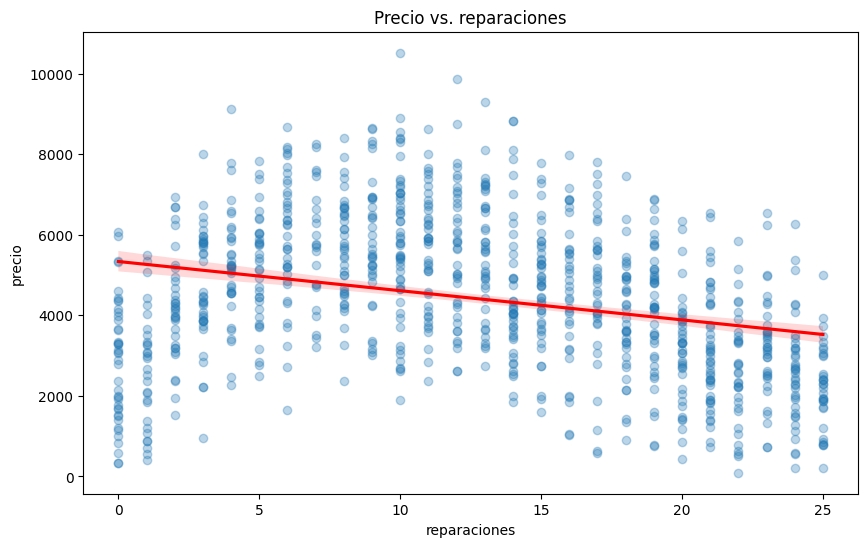

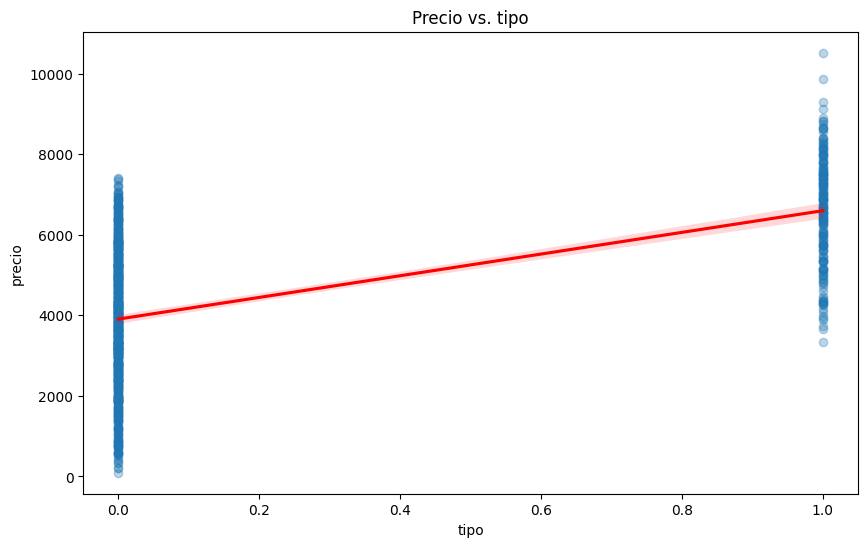

In [ ]:
# Lista de todas tus variables predictoras
variables_predictoras = ['edad_vendedor', 'edad_auto', 'km_recorridos', 'reparaciones', 'tipo']

for variable in variables_predictoras:

    # regplot crea un scatter plot y dibuja la línea de regresión
    plt.figure(figsize=(10, 6))
    sns.regplot(x=variable, y='precio', data=df_autos_limpio,
                line_kws={'color':'red'},
                scatter_kws={'alpha':0.3})
    plt.title(f'Precio vs. {variable}')
    plt.show()


Correlación más notoria positiva: tipo (0.56)

Ya que 0 significa que es un auto normal y 1 de colección, notamos que si varia muchisimo el precio dependiendo cual es, lo cual si es un factor influyente.

Correlaciones Negativas (Moderadas): km_recorridos (-0.42) y edad_auto (-0.37)

Esto es lógico. A medida que los km_recorridos o la edad_auto suben, el precio tiende a bajar.

Correlaciones debiles: reparaciones (-0.28) y edad_vendedor (0.01)

Reparaciones influye negativamente (más reparaciones, menos precio), pero infimo. edad_vendedor no tiene ninguna correlación con el precio, ese 0.01 podria adivinar que confian mas en un auto cuidado por una persona mayor que una joven.

Correlaciones fuertes: edad_auto vs. km_recorridos: 0.73

Este número (casi 1) significa que edad_auto y km_recorridos están fuertemente correlacionados entre sí. Ya que es el factor mas importante para determinar el uso de un auto.

# Modelado

R-cuadrado (R2): -0.0197
Error Absoluto Medio (MAE): 1481.47
Error Cuadrático Medio (MSE): 3552855.97


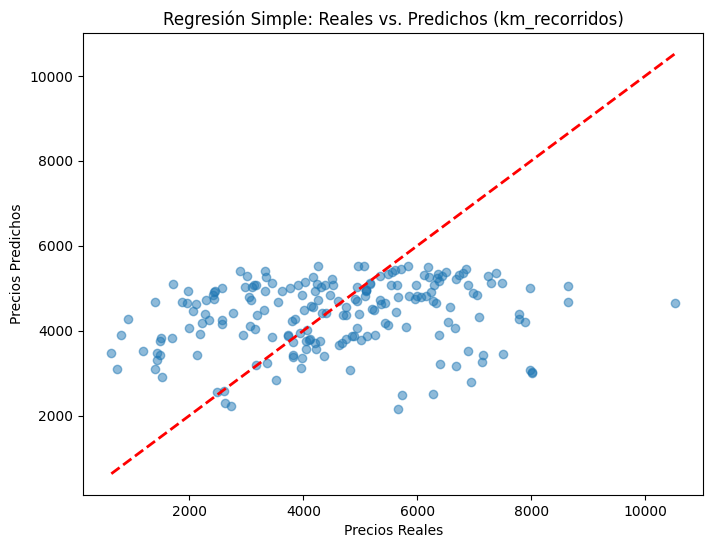

In [ ]:
# Preparamos los datos
X_train_simple = X_train[['km_recorridos']]
X_test_simple = X_test[['km_recorridos']]

# Creamos y entrenamos el modelo
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train)

# Hacemos predicciones en el set de testeo
y_pred_simple = lr_simple.predict(X_test_simple)

# Evaluación

mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"R-cuadrado (R2): {r2_simple:.4f}")
print(f"Error Absoluto Medio (MAE): {mae_simple:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse_simple:.2f}")

# Visualización (Reales vs. Predichos)

plt.figure(figsize=(8, 6))

# Graficamos los puntos reales (y_test)
plt.scatter(y_test, y_pred_simple, alpha=0.5)

# Graficamos la línea de 45 grados (donde y_test == y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Regresión Simple: Reales vs. Predichos (km_recorridos)")
plt.show()

Usamos los km_recorridos ya que era la variable mas marcada, con la que se podría verificar a simple vista si la predicción fue correcta o no, en este caso no lo fue.

*R-cuadrado (R2): -0.0197*

Un R2 negativo significa que el modelo es pesimo, un fracaso total en términos de predicción.

Esto nos dice que la variable km_recorridos por sí sola no tiene poder para explicar la variación en el precio en el set de testeo.

*Error Absoluto Medio (MAE): 1481.47*

Esto significa que, en promedio, las predicciones del modelo se equivocan por $1,481.

Si el precio promedio de un auto es $4300, un error de 1500 es altísimo.

*El Gráfico (Reales vs. Predichos)*

Esta es la prueba visual. Un modelo bueno tendría los puntos azules siguiendo la línea roja.

Este, en cambio, va casi a la inversa.

In [ ]:
# Creamos y entrenamos el modelo
# Usamos los X_train / y_train anteriormente creados
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

#  Hacemos predicciones en el set de testeo
y_pred_multiple = lr_multiple.predict(X_test)

# Evaluación

mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print(f"R-cuadrado (R2): {r2_multiple:.4f}")
print(f"Error Absoluto Medio (MAE): {mae_multiple:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse_multiple:.2f}")

R-cuadrado (R2): 0.5178
Error Absoluto Medio (MAE): 1061.20
Error Cuadrático Medio (MSE): 1680159.66


R-cuadrado (R2): 0.5178

El R2 pasó de -0.01 (nada) a 0.5178.

Esto significa que nuestro modelo, usando todas las variables, ahora puede explicar casi el 52% de la variación en el precio del auto. Que aunque no es perfecto es una mejora considerable.

Error Absoluto Medio (MAE): 1061.20

Mejoró aunque no tan bruzcamente, de 1481usd a  1061usd. (Si pongo signo dolar cambia la tipografía)

Sigue siendo un error considerable, pero es $420 mejor que el modelo anterior.

In [ ]:
# --- PASO 5: EVALUACIÓN CON DATOS DE ENTRENAMIENTO ---
# (Esto es lo que faltaba para el requisito)

print("\n--- Evaluación del Modelo (Train vs. Test) ---")

# 1. Hacemos predicciones en el set de ENTRENAMIENTO
y_pred_train = lr_multiple.predict(X_train)

# 2. Calculamos las métricas de ENTRENAMIENTO
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# 3. Imprimimos la comparativa (Punto 7d del proyecto)

print(f"\nMétricas con datos de ENTRENAMIENTO:")
print(f"R-cuadrado (R2): {r2_train:.4f}")
print(f"Error Absoluto Medio (MAE): {mae_train:.2f}")

print(f"\nMétricas con datos de TEST:")
print(f"R-cuadrado (R2): {r2_multiple:.4f}")
print(f"Error Absoluto Medio (MAE): {mae_multiple:.2f}")


--- Evaluación del Modelo (Train vs. Test) ---

Métricas con datos de ENTRENAMIENTO:
R-cuadrado (R2): 0.5943
Error Absoluto Medio (MAE): 981.66

Métricas con datos de TEST:
R-cuadrado (R2): 0.5178
Error Absoluto Medio (MAE): 1061.20


Análisis de Desempeño (Punto 7d)
Esto es exactamente lo que te pide el proyecto para la comparativa.

R2 (Train): 0.5943 (El modelo explica el 59.4% de la variación en los datos de entrenamiento).

R2 (Test): 0.5178 (El modelo explica el 51.8% de la variación en los datos nuevos).

Conclusión clave: Los dos números (0.59 y 0.52) son muy cercanos. Esto es bueno y significa que tu modelo es estable y no tiene overfitting (no está memorizando). Su capacidad de predicción es consistente, aunque moderada (un 52% no es genial, pero es aceptable).

In [ ]:
# Obtenemos los coeficientes de cada variable
coeficientes = lr_multiple.coef_

# Creamos una Serie de Pandas para verlos con sus nombres
importancia = pd.Series(coeficientes, index=X_train.columns)

print("\nImportancia de cada variable (Coeficientes)")
print(importancia.sort_values(ascending=False))


Importancia de cada variable (Coeficientes)
tipo             2630.338875
edad_vendedor      24.275046
edad_auto        -264.440919
reparaciones     -512.450289
km_recorridos    -717.044694
dtype: float64


Análisis de Coeficientes (Qué variable influye más)

Este resultado nos dice exactamente qué aprendió el modelo. Los números (coeficientes) nos dicen cuántos dólares cambia el precio por cada 1 unidad de cambio en la variable. $1 Punto =1 Dolar.$

La variable más favorecida: tipo (2630.33)

Si todo lo demás se mantiene igual, el hecho de que un auto sea "de colección" (tipo = 1) aumenta el precio predicho en $2,630. Esto confirma lo que vimos en el heatmap (0.56) y en el regplot.

Los Factores Negativos (El Desgaste):

km_recorridos (-717.04): Es el factor negativo más fuerte. Cada aumento en los kilómetros (estandarizados) reduce el precio en $717.

reparaciones (-512.45): Es el segundo factor negativo más fuerte. Cada aumento en reparaciones (estandarizadas) reduce el precio en $512.

El hallazgo clave (Multicolinealidad):
(Aclaracion de Multicolinealidad: Son datos que siempre van de la mano, ve que la edad del auto crece dependiendo el km y viceversa)

A pesar de eso edad_auto (-264.44) tiene un impacto mucho menor que km_recorridos.

La respuesta está en el heatmap (0.73):
Como edad_auto y km_recorridos están tan correlacionados, el modelo decidió asignar la mayor parte de la carga(el impacto negativo) a km_recorridos. Es una señal de que el modelo está funcionando de forma inteligente.

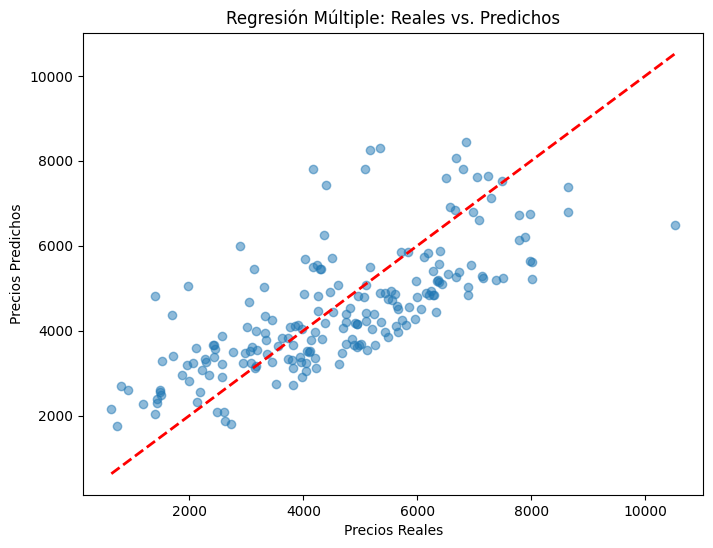

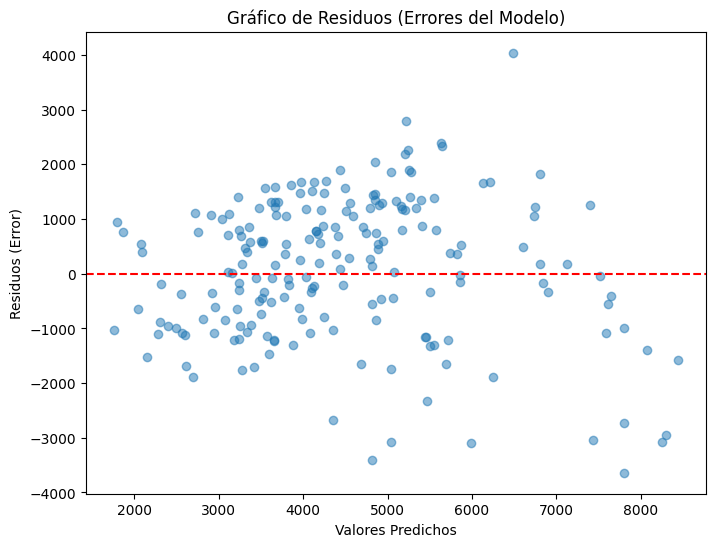

In [ ]:
# Visualización (Reales vs. Predichos)

plt.figure(figsize=(8, 6))

# Graficamos los puntos reales (y_test) vs. los predichos por este modelo
plt.scatter(y_test, y_pred_multiple, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Regresión Múltiple: Reales vs. Predichos")
plt.show()

#  Visualización (Gráfico de Residuos)
# Los residuos son el sobrante (basura) que el modelo no pudo predecir (y_test - y_pred)
residuos = y_test - y_pred_multiple
plt.figure(figsize=(8, 6))

# Si es que el codigo de residuos funciono bien, el grafico debería dar una nube de datos sin patrones
plt.scatter(y_pred_multiple, residuos, alpha=0.5)

# Línea en cero, para ver si los errores están balanceados
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos (Error)")
plt.title("Gráfico de Residuos (Errores del Modelo)")
plt.show()

## Gráfico "Reales vs. Predichos"

Análisis: Este gráfico es la prueba visual de que nuestro R2 de 0.5178 es real. A diferencia del primer modelo (donde los puntos formaban una nube horizontal), aquí los puntos azules siguen claramente la línea roja diagonal.

Conclusión: Esto nos dice que el modelo funciona. Cuando el precio real es alto el modelo predice un precio alto. Cuando el precio real es bajo predice un precio bajo.

## Gráfico de Residuos (La Prueba de Calidad)

Interpretación: Una nube de puntos aleatoria, lo cual esta bien, los residuos no deberían tener un patrón, son un conjunto de errores.

#  ***Regresión Polinómica (opcional)***

In [ ]:
# Creamos un "Pipeline"
# (secuencia de pasos automatizados para procesar datos, donde la salida de una función se convierte en la entrada de la siguiente)
# Esto es un objeto que hará dos pasos en orden:

# Crear las features polinómicas (x^2, x*y, etc)
# Aplicar la Regresión Lineal a esas nuevas features
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_regression', LinearRegression())
])

# Entrenamos el Pipeline
# Le pasamos los X_train originales
# El Pipeline se encarga de transformarlos y entrenar el modelo
poly_pipeline.fit(X_train, y_train)

# Hacemos predicciones en el set de testeo
y_pred_poly = poly_pipeline.predict(X_test)

# Evaluación (Polinómica)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"R-cuadrado (R2): {r2_poly:.4f}")
print(f"Error Absoluto Medio (MAE): {mae_poly:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse_poly:.2f}")

# Comparación Final de Modelos
print("\n--- Comparación Final de Métricas (Test Set) ---")
print("                     R2 (Test)   |   MAE (Test)")
print("")
print(f"Modelo 1 (Simple):     {r2_simple:10.4f}   |   {mae_simple:10.2f}")
print(f"Modelo 2 (Múltiple):   {r2_multiple:10.4f}   |   {mae_multiple:10.2f}")
print(f"Modelo 3 (Polinómico): {r2_poly:10.4f}   |   {mae_poly:10.2f}")

R-cuadrado (R2): 0.8964
Error Absoluto Medio (MAE): 495.98
Error Cuadrático Medio (MSE): 360826.69

--- Comparación Final de Métricas (Test Set) ---
                     R2 (Test)   |   MAE (Test)

Modelo 1 (Simple):        -0.0197   |      1481.47
Modelo 2 (Múltiple):       0.5178   |      1061.20
Modelo 3 (Polinómico):     0.8964   |       495.98


## Análisis de la Comparación Final

Modelo 1 (Simple): Malos resultados (R2 = -1.97%).

Modelo 2 (Múltiple): Un éxito decente (R2 = 51.78%).

Modelo 3 (Polinómico): Un éxito rotundo (R2 = 89.64%).

Este salto de 51.78% a 89.64% es el hallazgo más importante.

El MAE lo confirma:

El modelo múltiple se equivocaba, aproximadamente por $1061.

El modelo polinómico se equivoca, aproximadamente por $496.